# Comparison of classifiers on simulated data

In [1]:
from sklearn.datasets import make_moons, make_circles, make_classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap

The following are 3 useful functions for plotting a dataset (only training, or all data split into training and test) and the decision boundary of a model and the data

In [2]:
def plot_dataset_train(X, X_train, y_train):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(1,1,1)
    ax.set_title("Input data")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

In [3]:
def plot_dataset(X, X_train, y_train, X_test, y_test):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(1,1,1)
    ax.set_title("Input data")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.2, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

In [4]:
def plot_model(input_model, X, X_train, X_test, y_train, y_test):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(1,1,1)
    ax.set_title("Model decision boundary")
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(input_model, "decision_function"):
        Z = input_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = input_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter( X_test[:, 0], X_test[:, 1],c=y_test,
    cmap=cm_bright, edgecolors="k", alpha=0.2)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

Let's generate an almost linearly separable dataset and run the perceptron first, than SVM, then a NN with default parameters

In [5]:
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)


Let's plot the training dataset.

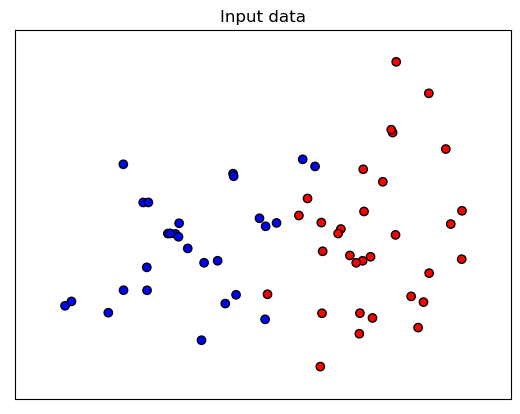

In [6]:
plot_dataset_train(X, X_train, y_train)

Let's now print all data (training and testing)

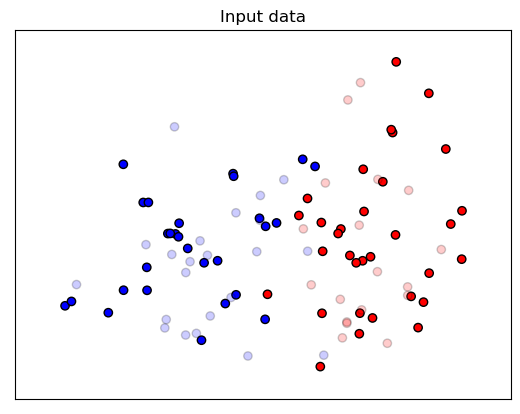

In [7]:
plot_dataset(X,X_train, y_train, X_test, y_test)

Now let's learn a perceptron, plot its decision boundary, and print the error on traning and on testing.

Training error:  0.033333333333333326
Test error:  0.050000000000000044


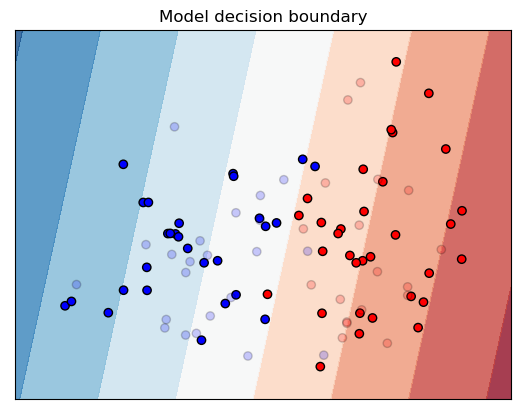

In [8]:
perc_model = Perceptron(random_state=11)
perc_model.fit(X_train, y_train)

plot_model(perc_model, X, X_train, X_test, y_train, y_test )

print("Training error: ", 1. - perc_model.score(X_train, y_train))

print("Test error: ", 1. - perc_model.score(X_test, y_test))

Let's do the same for SVM.

Training error:  0.050000000000000044
Test error:  0.050000000000000044


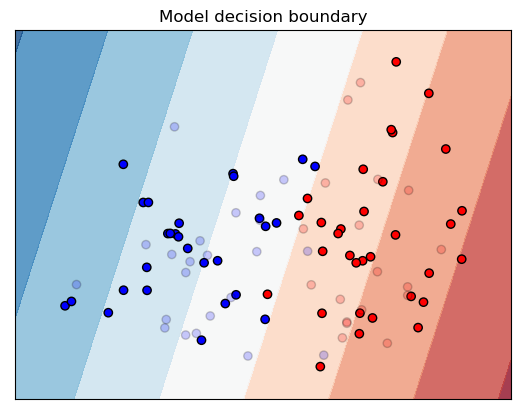

In [9]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

plot_model(svm,  X, X_train, X_test, y_train, y_test)

print("Training error: ", 1. - svm.score(X_train, y_train))

print("Test error: ", 1. - svm.score(X_test, y_test))

Let's try with a NN.

Training error:  0.01666666666666672
Test error:  0.050000000000000044


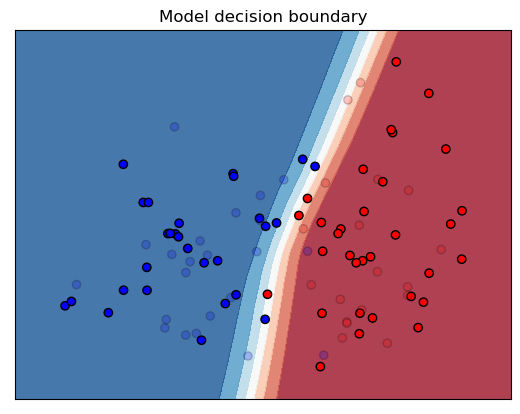

In [12]:
NN = MLPClassifier(max_iter=1000)
NN.fit(X_train, y_train)

plot_model(NN, X, X_train, X_test, y_train, y_test)

print("Training error: ", 1. - NN.score(X_train, y_train))

print("Test error: ", 1.- NN.score(X_test, y_test))


Let's try now with some more complex dataset.

In [13]:
X, y = make_moons(noise=0.3, random_state=0)

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)

Let's plot the training data.

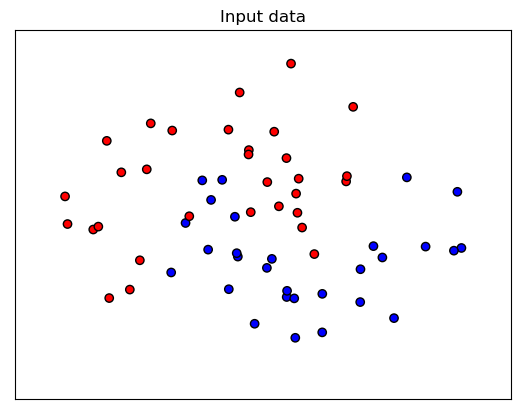

In [14]:
plot_dataset_train(X, X_train, y_train)

Let's plot all the data.

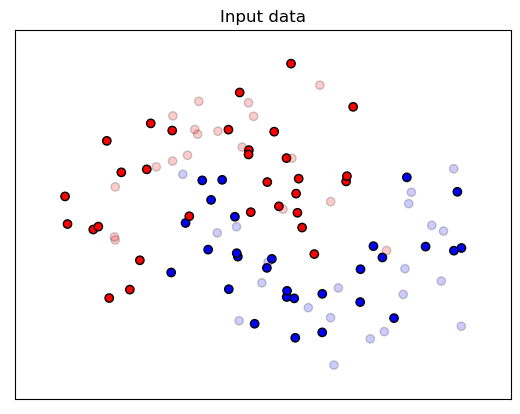

In [15]:
plot_dataset( X, X_train, y_train, X_test, y_test )

Let's run the perceptron.

Training error:  0.30000000000000004
Test error:  0.19999999999999996


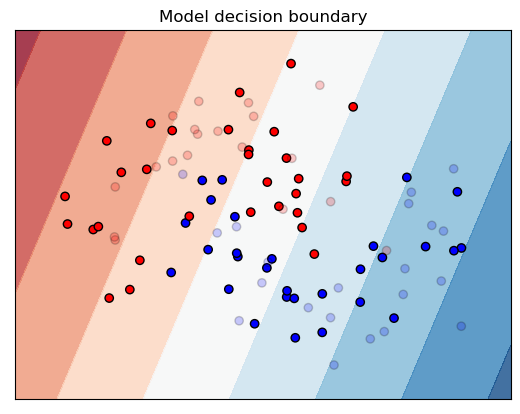

In [16]:
perc_model = Perceptron(random_state=11)
perc_model.fit(X_train, y_train)

plot_model(perc_model, X, X_train, X_test, y_train, y_test )

print("Training error: ", 1. - perc_model.score(X_train, y_train))

print("Test error: ", 1. - perc_model.score(X_test, y_test))

Let's run the SVM

Training error:  0.16666666666666663
Test error:  0.125


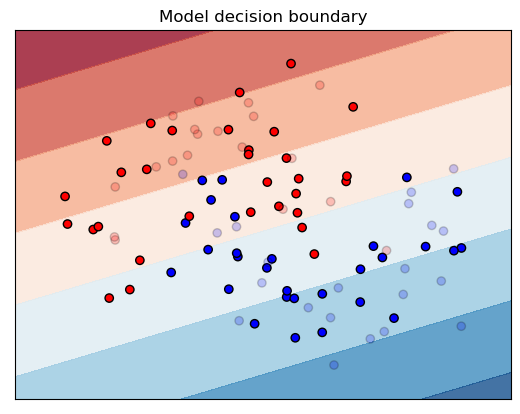

In [17]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

plot_model(svm,  X, X_train, X_test, y_train, y_test)

print("Training error: ", 1. - svm.score(X_train, y_train))

print("Test error: ", 1. - svm.score(X_test, y_test))

Let's try the NN

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Training error:  0.01666666666666672
Test error:  0.050000000000000044


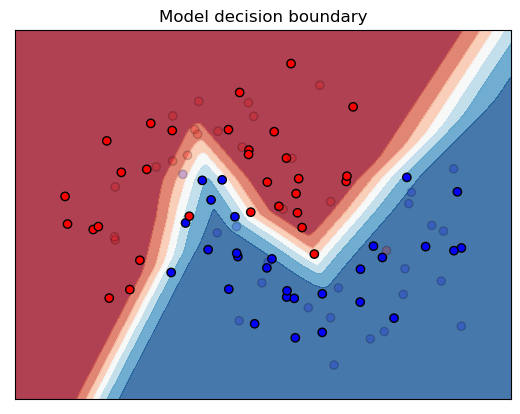

In [18]:
NN = MLPClassifier(max_iter=1000)
NN.fit(X_train, y_train)

plot_model(NN, X, X_train, X_test, y_train, y_test)

print("Training error: ", 1. - NN.score(X_train, y_train))

print("Test error: ", 1.- NN.score(X_test, y_test))

Another interesting dataset

In [19]:
X, y= make_circles(noise=0.2, factor=0.5, random_state=1)

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)

Let's plot the training data.

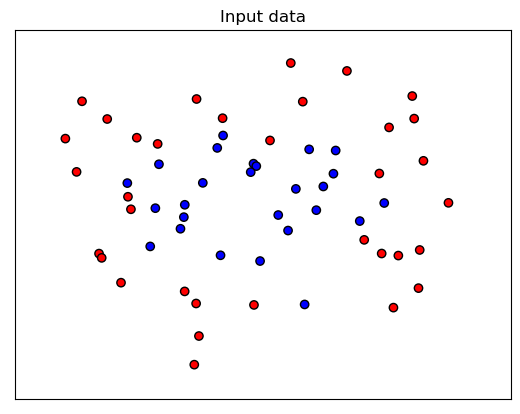

In [20]:
plot_dataset_train(X, X_train, y_train)


Let's plot all the data.

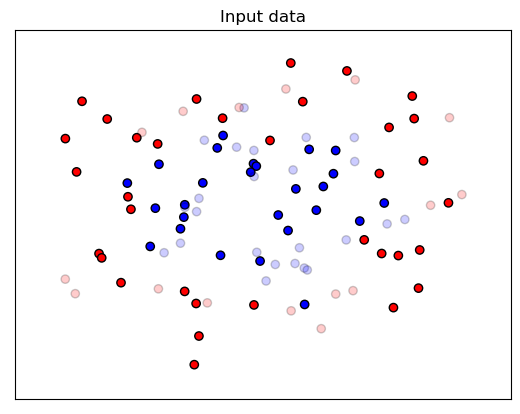

In [21]:
plot_dataset( X, X_train, y_train, X_test, y_test )

Let's run the perceptron

Training error:  0.5
Test error:  0.475


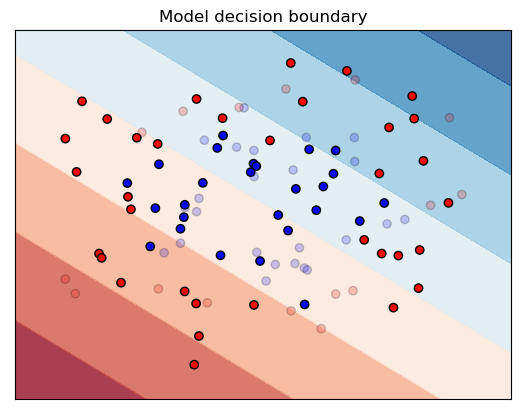

In [22]:
perc_model = Perceptron(random_state=11)
perc_model.fit(X_train, y_train)

plot_model(perc_model, X, X_train, X_test, y_train, y_test )

print("Training error: ", 1. - perc_model.score(X_train, y_train))

print("Test error: ", 1. - perc_model.score(X_test, y_test))

Let's run the SVM

Training error:  0.43333333333333335
Test error:  0.6


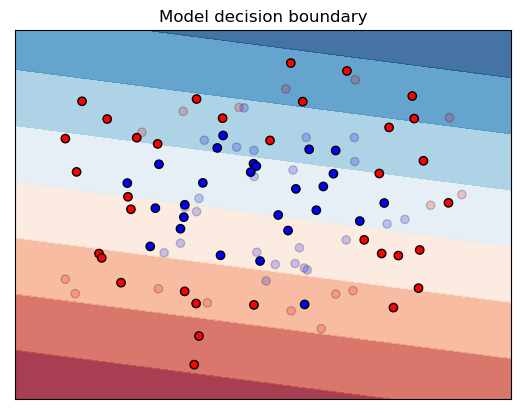

In [23]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

plot_model(svm,  X, X_train, X_test, y_train, y_test)

print("Training error: ", 1. - svm.score(X_train, y_train))

print("Test error: ", 1. - svm.score(X_test, y_test))

Let's run the NN

Training error:  0.033333333333333326
Test error:  0.125


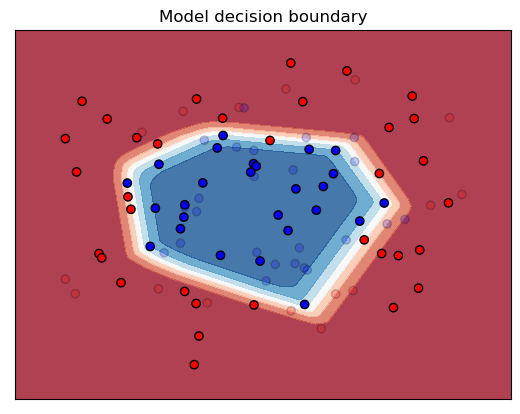

In [24]:
NN = MLPClassifier(max_iter=1000)
NN.fit(X_train, y_train)

plot_model(NN, X, X_train, X_test, y_train, y_test)

print("Training error: ", 1. - NN.score(X_train, y_train))

print("Test error: ", 1.- NN.score(X_test, y_test))